# Chapter 19. 군집

## 19.0 소개
* 특성만 아는 상황이 많다.
    * 타깃 데이터가 없으므로 지도 학습을 쓸 수 없다.
    * 비지도 학습을 이용할 수 있고, 클러스터를 보는 게 있다.
* 군집 알고리즘의 목적
    * 샘플에 잠재된 그룹을 식별한다.
    * 성공한다면, 타깃 벡터 없이 샘플의 클래스 예측이 가능하다.
    * 매우 많으며 다양하게 클러스터를 식별한다.

## 19.1 K-평균을 사용한 군집
* K-means 군집을 사용한다.

In [28]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

iris = datasets.load_iris()
features = iris.data

scaler = StandardScaler()
features_std = scaler.fit_transform(features)

cluster = KMeans(n_clusters=3, random_state=0, n_jobs=-1)

model =  cluster.fit(featuers_std)

* K-Means 작동 방식

1. K 개의 클러스터 중심 포인트를 랜덤한 위치에 만든다.
2. 각 샘플에 대해,
    a. 각 샘플과 K개의 중심 포인트 사이 거리 계산
    b. 샘플을 가장 가까운 중심 포인트의 클러스터에 할당한다.
3. 중심 포인트를 해당하는 클러스터 평균(중심)으로 이동한다.
4. 더 이상 샘플의 클러스터 소속이 변하지 않을때까지 단계 2와 3을 반복한다.

In [29]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [30]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* 샘플의 실제 클래스와 비교하면, 레이블 값은 다르지만 k-평균 결과가 상당히 좋다는 것을 확인할 수 있다.


In [31]:
# 새로운 샘플 제작
new_observation = [[0.8, 0.8, 0.8, 0.8]]

# 샘플의 클러스터 예측
model.predict(new_observation)

array([0])

In [32]:
# 클러스터 중심 확인
model.cluster_centers_

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

* k-means++ : KMEANS 클래스의 init 파라미터 기본값으로 된 알고리즘이다.
    * random으로 지정하면 초기 중심 포인트를 랜덤으로 택한다.
    * 이 알고리즘은 중심 포인트 하나를 먼저 랜덤하게 선택하고 이전 중심 포인트와의 거리를 고려해서 다음 중심 포인트를 선택한다.

In [33]:
model.inertia_

139.82049635974982

* inertia_ : 이너셔, KMeans 클래스는 n_init 횟수만큼 반복하여 최상의 결과를 만드는 중심 포인트를 찾는다.(기본값 10)
    * 비교하는 기준 : 샘플과 클러스터 중심까지의 거리 합입니다.
    * 이 기준이 inertia_ 속성에 저장되어 있다.

In [34]:
model.score(featuers_std)

-139.82049635974982

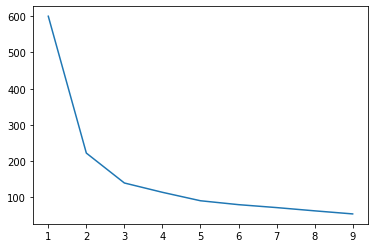

In [36]:
# n_clusters 파라미터 기본값은 8이고, n_clusters 값을 결정하려면 이를 바꾸어가며 이너셔 값이 크게 변하는 위치를 찾는다.
import matplotlib.pyplot as plt

inertia = []
for n in range(1, 10):
    kmeans = KMeans(n_clusters=n, random_state=0)
    inertia.append(kmeans.fit(features_std).inertia_)

plt.plot(range(1,10), inertia)
plt.show()

## 19.2 K-평균 군집 속도 향상하기


* 평균 이동 군집을 사용한다.(Meanshift)

In [37]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift

iris = datasets.load_iris()
features = iris.data

scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# meanshift 객체 제작
cluster = MeanShift(n_jobs=-1)

# 모델 훈련
model = cluster.fit(featuers_std)

* 단점 : 훈련 전에 클러스터 개수 k개 지정해야 한다.
* 클러스터 형태도 가정해야 한다. 제약이 없는 군집 알고리즘을 생각해 보면, 평균이동 군집이 있다.


1. bandwidth : 샘플의 이동 방향을 결정하기 위해 사용하는 면적(커널)의 반경
2. 평균 이동에서 샘플의 커널 안에 다른 샘플이 하나도 없는 경우에는 이런 외톨이 샘플을 모두 가장 가까운 샘플 커널에 할당 한다.
    * 그대로 두려면 cluster_all =False 지정한다.
    * 이 때 외톨이 샘플은 그 레이블이 -1이 된다.


In [38]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [39]:
model.cluster_centers_

array([[ 0.50161528, -0.32287436,  0.65393539,  0.65261739],
       [-1.05954571,  0.75811468, -1.2998088 , -1.25401594]])

## 19.4  DBSCAN을 사용한 군집
* 샘플의 밀집 영역을 클러스터로 그루핑한다.

In [40]:
# DBSCAN
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

iris = datasets.load_iris()
features = iris.data

scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# DBSCAN 객체 반환
cluster = DBSCAN(n_jobs=-1)

# 모델 훈련
model = cluster.fit(features_std)

* DBSCAN : 많은 샘플이 밀집된 영역이 클러스터라는 아이디어로 착안

1. 랜덤한 샘플 선택
2. x가 최소한 가까운 이웃을 가지면 클러스터 일부로 간주한다.
3. 단계 2를 모든 x의 이웃과 이웃의 이웃 등에 대해 재귀적으로 반복한다. 클러스터의 핵심 샘플이 된다.
4. 단계 3이 가까운 샘플에 대해 모두 진행되면 새로운 랜덤 샘플 선택한다.

In [41]:
# 클러스터 소속 확인
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

In [42]:
# 핵심 샘플의 인덱스
model.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  17,
        19,  20,  21,  23,  24,  25,  26,  27,  28,  29,  30,  31,  34,
        35,  36,  37,  38,  39,  40,  42,  43,  44,  45,  46,  47,  48,
        49,  52,  54,  55,  58,  61,  63,  64,  65,  66,  67,  69,  71,
        73,  74,  75,  77,  78,  79,  80,  81,  82,  83,  86,  88,  89,
        90,  91,  92,  94,  95,  96,  97,  99, 101, 103, 104, 110, 111,
       112, 116, 120, 123, 126, 133, 137, 138, 139, 140, 141, 142, 143,
       145, 147], dtype=int64)

In [45]:
# 새로운 데이터 예측은 불가능하다. 따라서 이 훈련 데이터에 대한 예측 결과는 fit_predict 메서드를 활용해야 한다.
cluster.fit_predict(features_std)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

## 19.5 계층적 병합을 사용한 군집
* 클러스터 계층을 사용하여 샘플을 그룹으로 나누고 싶다.
* 병합 군집 사용한다.

In [46]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

iris = datasets.load_iris()
features = iris.data

scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# 병합 군집 객체 제작
cluster = AgglomerativeClustering(n_clusters=3)

# 모델 훈련
model = cluster.fit(features_std)

* 병합 군집 : 강력하고 유연한 계층적 군집 알고리즘
    * 모든 샘플이 각자 하나의 클러스터로 시작한다.
    * 다음 특정 조건에 부합하는 클러스터들이 서로 병합된다. 종료 조건에 도달할 때까지 반복되어 클러스터가 커진다.
    * 사이킷런의 AgglomerativeClustering 클래스 : linklage 매개변수로 다음의 내용을 최소화 시킨다.
        * 병합된 클러스터 분산
        * 두 클러스터 샘플 간 평균 거리
        * 두 클러스터 샘플 간 최대 거리

* affinity : linkage 사용할 거리 측정 방식 결정
* n_clusters: 이 군집 알고리즘이 찾을 클러스터 수를 지정한다. 해당 수치만큼 연속적으로 병합한다.

In [48]:
# 클러스터 소속 확인
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [49]:
 cluster.fit_predict(features_std)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)